# Cart Pole analisis

[Simple Reinforcement Learning with Tensorflow: Part 2 - Policy-based Agents](https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-2-ded33892c724#.zh7rnjs25)

https://medium.com/@awjuliani/maximum-entropy-policies-in-reinforcement-learning-everyday-life-f5a1cc18d32d

https://medium.com/@thechrisyoon/deriving-policy-gradients-and-implementing-reinforce-f887949bd63


![alt text](cart_pole.gif "Title")

In [1]:
%load_ext autoreload
%autoreload 2

# Instalación de librería gym

https://gym.openai.com/

pip install gym

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [3]:
#     Description:
#         A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
#         The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.
#     Source:
#         This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson
#     Observation: 
#         Type: Box(4)
#         Num	Observation                 Min         Max
#         0	Cart Position             -4.8            4.8
#         1	Cart Velocity             -Inf            Inf
#         2	Pole Angle                 -24 deg        24 deg
#         3	Pole Velocity At Tip      -Inf            Inf
        
#     Actions:
#         Type: Discrete(2)
#         Num	Action
#         0	Push cart to the left
#         1	Push cart to the right
        
#         Note: The amount the velocity that is reduced or increased is not fixed; it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it
#     Reward:
#         Reward is 1 for every step taken, including the termination step
#     Starting State:
#         All observations are assigned a uniform random value in [-0.05..0.05]
#     Episode Termination:
#         Pole Angle is more than 12 degrees
#         Cart Position is more than 2.4 (center of the cart reaches the edge of the display)
#         Episode length is greater than 200
#         Solved Requirements
#         Considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.

In [4]:
# Instancio cartpole
env = gym.make("CartPole-v0")

### env.reset devuelve el estado:

In [5]:
(position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole) = env.reset()
# (position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole), reward, done, _ = env.step(env.action_space.sample())
print('position_of_cart:', position_of_cart)
print('velocity_of_cart:', velocity_of_cart)
print('angle_of_pole:', angle_of_pole)
print('rotation_rate_of_pole:', rotation_rate_of_pole)

position_of_cart: 0.03212844837849718
velocity_of_cart: 0.007353231039999589
angle_of_pole: 0.015882787221403516
rotation_rate_of_pole: 0.014677896599169113


### env.step devuelve el estado, el reward como consecuencia de la acción, y si terminó o no el episodio

In [7]:
# env.action_space.sample() muestrea el espacio de acción
(position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole), reward, done, _ = env.step(env.action_space.sample())
print('position_of_cart:', position_of_cart)
print('velocity_of_cart:', velocity_of_cart)
print('angle_of_pole:', angle_of_pole)
print('rotation_rate_of_pole:', rotation_rate_of_pole)
print('reward:', reward)
print('done:', done)

position_of_cart: 0.036320389888328045
velocity_of_cart: 0.00689485697298764
angle_of_pole: 0.010717308985084379
rotation_rate_of_pole: 0.024788973368798484
reward: 1.0
done: False


### Espacio de observación y de acción

In [8]:
print(type(env.action_space), env.action_space.n)
print(type(env.observation_space), env.observation_space.shape)

<class 'gym.spaces.discrete.Discrete'> 2
<class 'gym.spaces.box.Box'> (4,)


In [11]:
# Muestrea el espacio de observación
env.observation_space.sample()

array([-3.0029142e+00, -2.9594068e+38,  1.4131726e-01,  2.9138610e+38],
      dtype=float32)

# Play random episode

In [21]:
from reinforce_alg_helper import get_random_episode, plot_episode, get_observations_stats

In [24]:
states, actions, rewards, reward_sum, discounted_rewards = get_random_episode(env)

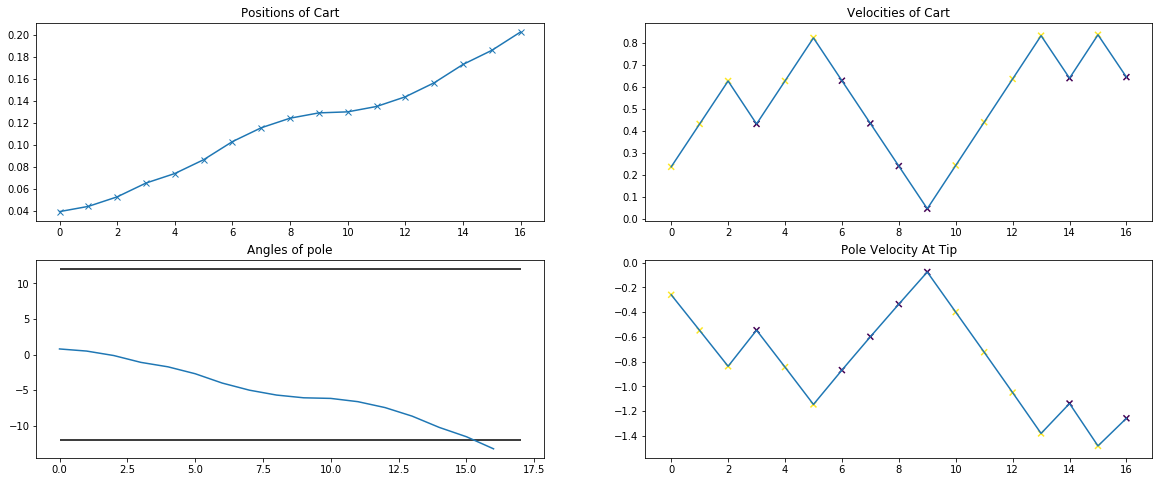

In [25]:
plot_episode(*states.T, actions)

Media de las acciones [0,1]: 0.4998429380457903
Media de rewards: 22.2842


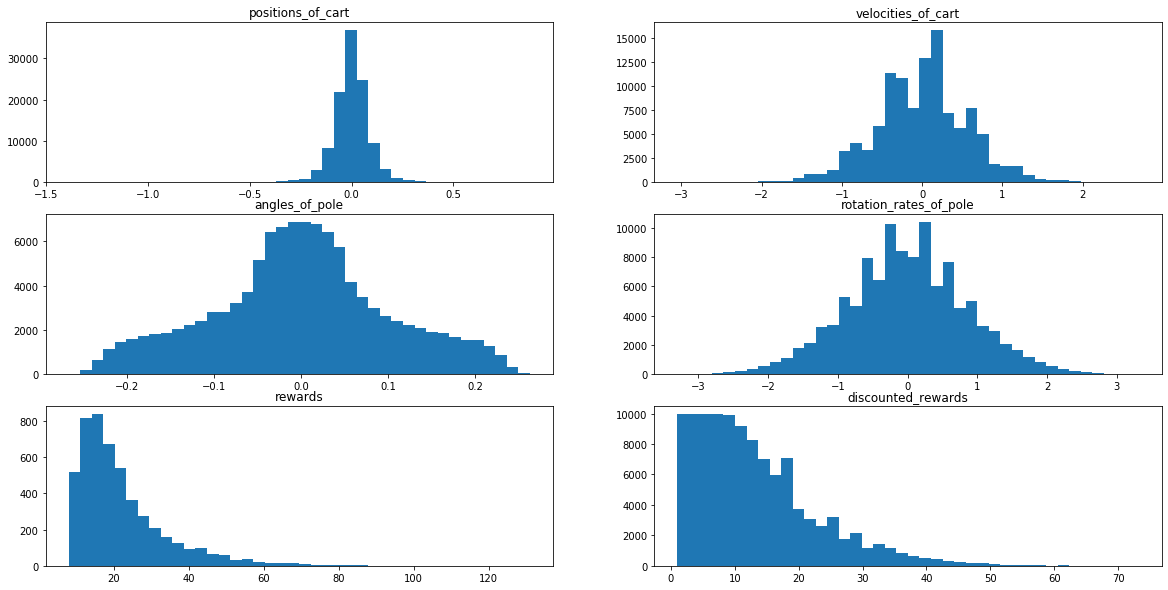

CPU times: user 9.2 s, sys: 2.52 s, total: 11.7 s
Wall time: 8.44 s


In [26]:
%time states_means, states_stds = get_observations_stats(env, get_random_episode, N=5000)

In [16]:
states_means, states_stds

(array([-0.00078585,  0.00496126,  0.00100266, -0.00284635]),
 array([0.10118803, 0.56367156, 0.1026144 , 0.85079903]))

## Setting up a Neural Network agent
We will use a policy neural network that takes observations, passes them through a single hidden layer and then produces a probability of choosing a left/right movement.

In [17]:
from reinforce_alg_helper import get_policy_model, discount_rewards, score_model, run_episode

In [18]:
hidden_layer_neurons = 8
lr = 1e-2
model_train, model_predict = get_policy_model(env, hidden_layer_neurons, lr)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model_predict.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
out (Dense)                  (None, 2)                 16        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_train.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
out (Dense)                  (None, 2)                 16        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_predict.input, model_train.input

(<tf.Tensor 'input_x:0' shape=(?, 4) dtype=float32>,
 [<tf.Tensor 'input_x:0' shape=(?, 4) dtype=float32>,
  <tf.Tensor 'advantages:0' shape=(?, 1) dtype=float32>])

Media de las acciones [0,1]: 0.951708341286505
Media de rewards: 10.478


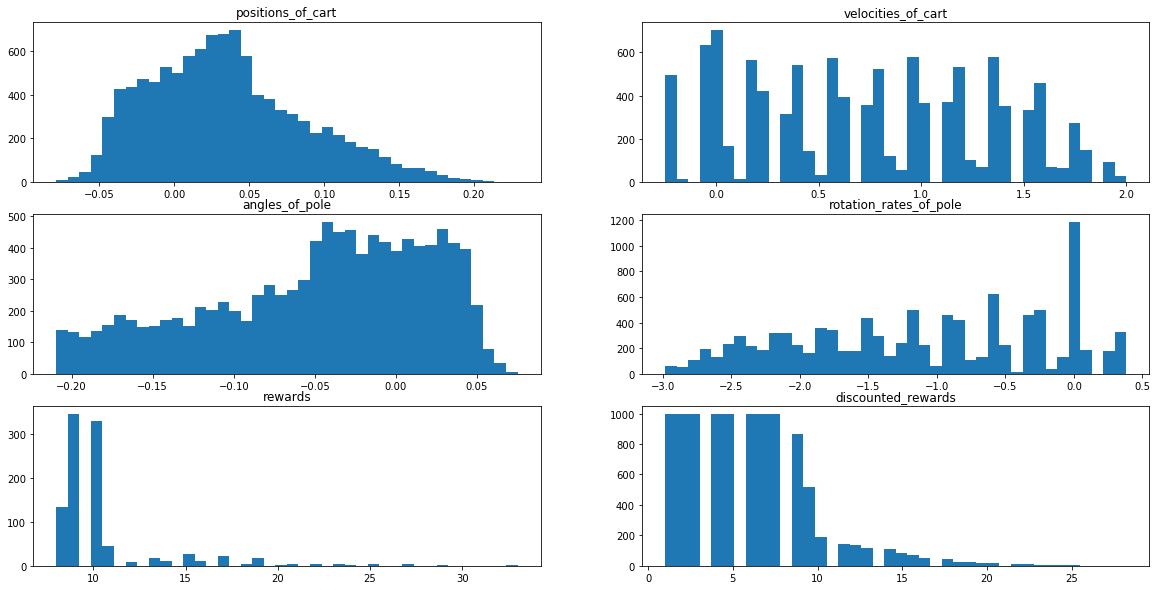

CPU times: user 5.31 s, sys: 314 ms, total: 5.62 s
Wall time: 3.57 s


In [23]:
%time states_means, states_stds = get_observations_stats(env, lambda env: run_episode(env, model_predict, greedy=True), N=1000)

Media de las acciones [0,1]: 0.5655489248839632
Media de rewards: 21.114


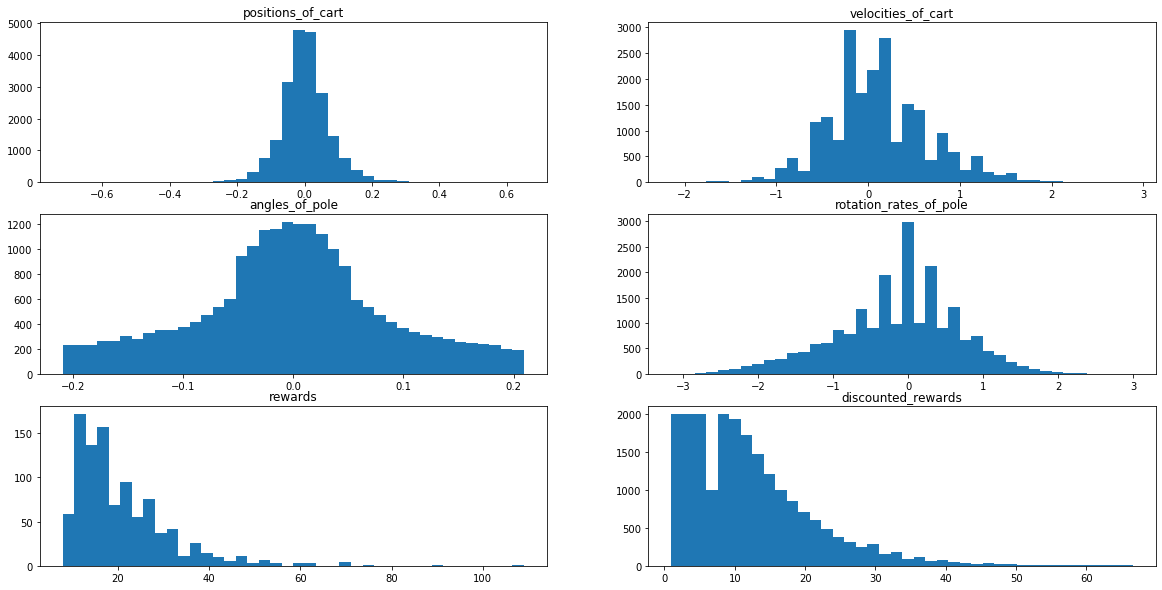

CPU times: user 11.4 s, sys: 642 ms, total: 12 s
Wall time: 7.63 s


In [26]:
%time states_means, states_stds = get_observations_stats(env, lambda env: run_episode(env, model_predict, greedy=False), N=1000)

# Ejemplo primer episodio

In [27]:
states, actions, rewards, reward_sum, discounted_rewards_episode = run_episode(env, model_predict, gamma=0.99)

In [28]:
states.shape, actions.shape, rewards.shape, reward_sum

((18, 4), (18, 1), (18, 1), 18.0)

In [29]:
discounted_rewards = np.empty(0).reshape(0,1)
total_actions = np.empty(0).reshape(0,1)

In [30]:
discounted_rewards_episode.reshape(-1)

array([16.54862385, 15.70568066, 14.85422289, 13.99416454, 13.12541872,
       12.2478977 , 11.36151283, 10.46617457,  9.5617925 ,  8.64827525,
        7.72553056,  6.79346521,  5.85198506,  4.90099501,  3.940399  ,
        2.9701    ,  1.99      ,  1.        ])

In [31]:
discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
discounted_rewards.shape

(18, 1)

In [32]:
total_actions = np.vstack([total_actions, actions])
total_actions.shape

(18, 1)

# Segundo episodio

In [33]:
states, actions, rewards, reward_sum, discounted_rewards_episode = run_episode(env, model_predict)

In [34]:
states.shape, actions.shape, rewards.shape, reward_sum

((13, 4), (13, 1), (13, 1), 13.0)

In [35]:
discounted_rewards_episode.reshape(-1)

array([12.2478977 , 11.36151283, 10.46617457,  9.5617925 ,  8.64827525,
        7.72553056,  6.79346521,  5.85198506,  4.90099501,  3.940399  ,
        2.9701    ,  1.99      ,  1.        ])

# Mergeamos ambos episodios

In [37]:
discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
discounted_rewards.shape

(31, 1)

In [38]:
total_actions = np.vstack([total_actions, actions])
total_actions.shape

(31, 1)

In [39]:
from reinforce_alg_helper import apply_baselines
discounted_rewards_normalized = apply_baselines(discounted_rewards)

In [40]:
discounted_rewards_normalized.reshape(-1)

array([ 1.92917517,  1.73812245,  1.54513991,  1.35020805,  1.15330719,
        0.95441742,  0.75351867,  0.55059064,  0.34561283,  0.13856453,
       -0.07057516, -0.28182737, -0.49521344, -0.71075493, -0.92847361,
       -1.14839146, -1.37053071, -1.59491379,  0.95441742,  0.75351867,
        0.55059064,  0.34561283,  0.13856453, -0.07057516, -0.28182737,
       -0.49521344, -0.71075493, -0.92847361, -1.14839146, -1.37053071,
       -1.59491379])

## Pasamos acciones a one hot enconding

In [41]:
from reinforce_alg_helper import actions_to_one_hot

In [42]:
actions_train = actions_to_one_hot(total_actions)

In [43]:
print(actions_train)
actions_train.shape

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


(31, 2)

# Genero un batch de datos para despues entrenar la red

In [44]:
def get_batch_data(model, batch_size=50):
    batch_states = np.empty(0).reshape(0,model.input_shape[1])
    batch_actions = np.empty(0).reshape(0,1)
    discounted_rewards = np.empty(0).reshape(0,1)
    batch_probs = np.empty(0).reshape(0,2)
    for i in range(batch_size):
        states, actions, _, _, discounted_rewards_episode, probs= run_episode(env, model, get_probs=True)
        discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
        batch_states = np.vstack([batch_states, states]) 
        batch_actions = np.vstack([batch_actions, actions]) 
        batch_probs = np.vstack([batch_probs, np.array(probs)])
    return batch_states, batch_actions, discounted_rewards, batch_probs

In [45]:
batch_states, batch_actions, discounted_rewards, batch_probs = get_batch_data(model_predict, 50)

In [46]:
batch_states.shape, batch_actions.shape, discounted_rewards.shape, batch_probs.shape

((1038, 4), (1038, 1), (1038, 1), (1038, 2))

In [47]:
discounted_rewards = apply_baselines(discounted_rewards)

In [48]:
actions_train = actions_to_one_hot(batch_actions)

In [49]:
discounted_rewards.shape, batch_actions.shape, actions_train.shape, batch_states.shape

((1038,), (1038, 1), (1038, 2), (1038, 4))

In [50]:
model_train.evaluate([batch_states, discounted_rewards], actions_train, verbose=1)

1038/1038 [==============================] - 0s 24us/step


0.039625574054056506

In [51]:
training_episodes = 5
for i in range(training_episodes):
    loss = model_train.train_on_batch([batch_states, discounted_rewards], actions_train)
    print(loss)

Instructions for updating:
Use tf.cast instead.
0.039625578
0.031740293
0.02430615
0.017326621
0.010819271
